# **Customer Segmentation**

**Data Preprocessing**

In [195]:
import pandas as pd
df = pd.read_csv('customer_behavior_analytcis.csv')
df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


In [196]:
df.shape

(999, 6)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


**Handling Missing Values**

In [198]:
df.isnull().sum()/len(df)*100

total_purchases     2.002002
avg_cart_value      2.002002
total_time_spent    0.000000
product_click       2.002002
discount_counts     0.000000
customer_id         0.000000
dtype: float64

In [199]:
df = df.dropna()

In [200]:
df.isnull().sum()

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64

In [201]:
df.shape

(979, 6)

In [202]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_purchases,979.0,11.570991,7.016327,0.00,6.00,10.00,17.000,32.00
avg_cart_value,979.0,75.457978,55.067835,10.26,33.13,49.38,121.255,199.77
total_time_spent,979.0,49.376966,32.785737,5.12,22.33,40.31,77.270,119.82
product_click,979.0,28.237998,16.296384,4.00,16.00,21.00,45.000,73.00
discount_counts,979.0,4.309499,4.514147,0.00,1.00,2.00,8.000,21.00


**Outlier Detection and Treatment**

In [203]:
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
  return outliers


In [204]:
outliers1 = find_outliers_IQR(df['total_purchases'])
print("number of outliers in total_purchases: "+ str(len(outliers1)))
outliers1
outliers2 = find_outliers_IQR(df['avg_cart_value'])
print("number of outliers in avg_cart_value: "+ str(len(outliers2)))
outliers2
outliers3 = find_outliers_IQR(df['total_time_spent'])
print("number of outliers in total_time_spent: "+ str(len(outliers3)))
outliers3
outliers4 = find_outliers_IQR(df['product_click'])
print("number of outliers in product_click: "+ str(len(outliers4)))
outliers4
outliers5 = find_outliers_IQR(df['discount_counts'])
print("number of outliers in discount_counts: "+ str(len(outliers5)))
outliers5

number of outliers in total_purchases: 0
number of outliers in avg_cart_value: 0
number of outliers in total_time_spent: 0
number of outliers in product_click: 0
number of outliers in discount_counts: 2


174    21.0
866    20.0
Name: discount_counts, dtype: float64

In [205]:
df.drop(df.index[[174,866]], inplace=True)

In [206]:
df.shape

(977, 6)

**Save Cleaned Dataset**

In [207]:
df.to_csv('customer_behavior_analytcis_cleaned.csv', index=False)

In [208]:
cleaned_df = pd.read_csv('customer_behavior_analytcis_cleaned.csv')
cleaned_df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


**Data Transformation**

In [209]:
from sklearn.preprocessing import StandardScaler
df_numeric = cleaned_df.drop(columns=(['customer_id']))
ss = StandardScaler()
df_scaled = ss.fit_transform(df_numeric)
df_scaled

array([[-0.65162376,  0.97709047,  0.08668875, -0.62805588, -0.95475315],
       [ 1.48809082, -0.93240724, -1.22674222, -0.81252644,  0.59584215],
       [-1.36486195, -0.78714305,  1.26382604,  1.33963016, -0.51172592],
       ...,
       [ 0.91750027, -1.01684204, -0.62839465, -0.62805588,  0.81735576],
       [-1.07956668, -0.84543031,  0.70092705,  1.77006148, -0.29021231],
       [ 2.4866243 , -0.65803951, -1.20229492, -0.75103625,  1.4818966 ]],
      shape=(977, 5))

In [210]:
df_scaled = pd.DataFrame(df_scaled,columns = df_numeric.columns)
df_scaled.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,-0.651624,0.977090,0.086689,-0.628056,-0.954753
1,1.488091,-0.932407,-1.226742,-0.812526,0.595842
2,-1.364862,-0.787143,1.263826,1.339630,-0.511726
3,1.916034,-0.883925,-1.164707,-0.751036,1.260383
4,-0.651624,0.906456,-0.462764,0.109826,-0.290212


In [211]:
df_scaled.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,9.770000e+02,9.770000e+02,9.770000e+02,9.770000e+02,9.770000e+02
mean,7.636334e-17,5.636342e-17,-4.363620e-17,-1.018178e-16,1.090905e-17
std,1.000512e+00,1.000512e+00,1.000512e+00,1.000512e+00,1.000512e+00
min,-1.650157e+00,-1.185167e+00,-1.351118e+00,-1.488919e+00,-9.547531e-01
25%,-7.942714e-01,-7.686219e-01,-8.255010e-01,-7.510363e-01,-7.332395e-01
50%,-2.236808e-01,-4.724645e-01,-2.757424e-01,-4.435853e-01,-5.117259e-01
75%,7.748526e-01,8.370921e-01,8.515835e-01,1.032179e+00,8.173558e-01
max,2.914567e+00,2.255960e+00,2.154013e+00,2.753904e+00,3.697033e+00


**K-Means Clustering & Visualization**

Finding the Optimal Number of Clusters

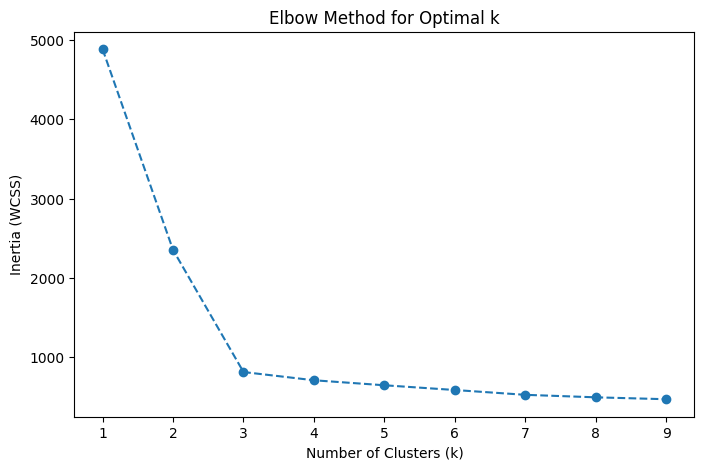

In [212]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Find the optimal k using the Elbow Method
inertia = []
K_range = range(1, 10)  # Testing k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

Applying K-Means Clustering

In [213]:
# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Add cluster labels to original dataset
cleaned_df["Cluster"] = df_scaled["Cluster"]

Visualizing the Clusters

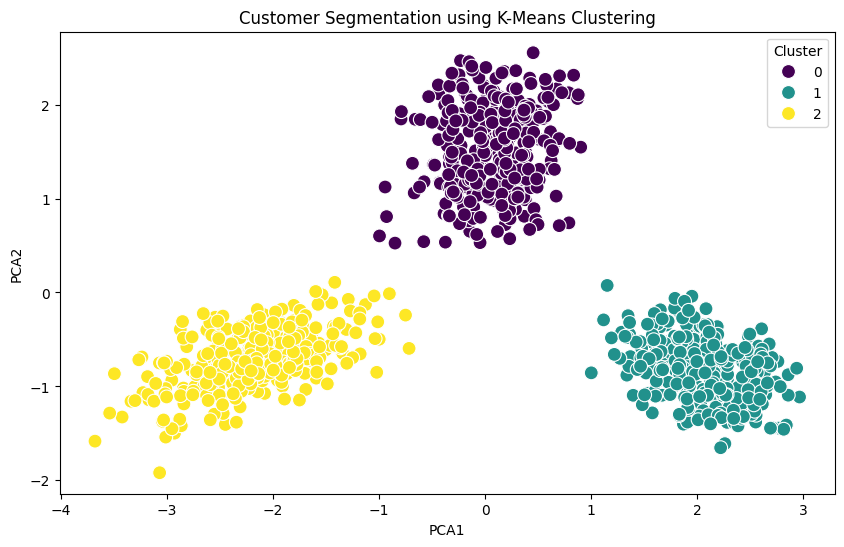

In [214]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop(columns=["Cluster"]))

cleaned_df["PCA1"] = pca_result[:, 0]
cleaned_df["PCA2"] = pca_result[:, 1]

# Scatter Plot of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=100)
plt.title("Customer Segmentation using K-Means Clustering")
plt.show()


Analyzing Cluster Characteristics

In [ ]:
import numpy as np

numeric_columns = cleaned_df.select_dtypes(include=[np.number]).columns
cluster_summary = cleaned_df[numeric_columns].groupby(cleaned_df["Cluster"]).mean()
print(cluster_summary)

         total_purchases  avg_cart_value  total_time_spent  product_click  \
Cluster                                                                     
0              10.175385      147.327169         40.284369      19.895385   
1               4.862385       49.032049         90.034740      49.675841   
2              19.707692       30.392646         17.430154      14.938462   

         discount_counts  Cluster      PCA1      PCA2  
Cluster                                                
0               1.972308      0.0  0.086167  1.528836  
1               1.030581      1.0  2.069912 -0.823209  
2               9.947692      2.0 -2.168816 -0.700560  


Assigning Meaningful Labels to Clusters

In [ ]:
cluster_mapping = {
    0: "High Spenders",
    1: "Window Shoppers",
    2: "Bargain Hunters"
}

cleaned_df["Customer_Segment"] = cleaned_df["Cluster"].map(cluster_mapping)

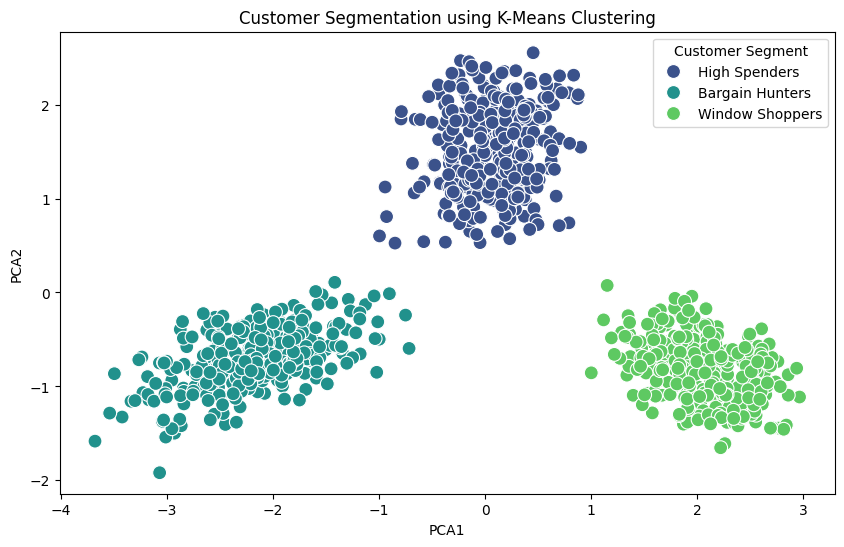

In [217]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x="PCA1", y="PCA2", hue="Customer_Segment", palette="viridis", s=100)
plt.title("Customer Segmentation using K-Means Clustering")
plt.legend(title="Customer Segment")
plt.show()

In [218]:
cleaned_df.to_csv("customer_segments.csv", index=False)